## 第二次作业
张露雨 519130910018

### Part-1 ：Confident Interval (CI) and Null hypothesis significance test (NHST): 

对于随机样本x1, x2 （用如下python代码产生）

n1=25

np.random.seed(100)

x1=stats.norm.rvs(3,3,n1)+stats.uniform.rvs(-1,1,n1)

x2=stats.uniform.rvs(-1,1,n1)**2+x1

（1）请检验x1，x2的正态性；然后根据正态性，完成下面两个计算：

（2）计算x1，x2对应总体均值的99% CI

（3）计算x1，x2总体均值差值的95% CI

（4）利用置信区间和NHST两种方法推断x1来自的总体均值是否大于2.0

（5）利用置信区间和NHST两种方法推断x1，x2来自的总体均值是否相等；并计算effect size (Cohen's d)

In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#产生数据
n1=25
np.random.seed(100)
x1=stats.norm.rvs(3,3,n1)+stats.uniform.rvs(-1,1,n1)  #一组25个数，均值3，标准差3的正态+[-1,1]的均匀分布
x2=stats.uniform.rvs(-1,1,n1)**2+x1      #感觉是配对样本

### （1）请检验x1，x2的正态性；然后根据正态性，完成下面两个计算：

In [3]:
#第一问
mu1 = np.mean(x1)    #计算均值
sigma1 = np.std(x1)  #就算标准误，单样本中标准误=标准差
skew1 = stats.skew(x1)        #计算偏度
kurtosis1 = stats.kurtosis(x1) #计算峰度
skew1_z=skew1/sigma1           #计算偏度Z-score
kurtosis1_z=kurtosis1/sigma1   #计算峰度Z-score
if ((-1.96<=skew1_z<=1.96) and  (-1.96<=kurtosis1_z<=1.96)):
    print("x1偏度Z-score=",round(skew1_z,5),"     x1峰度Z-score=",round(kurtosis1_z,5),"------>  x1在95%置信区间服从正态分布")
else:
    print("x1偏度Z-score=",round(skew1_z,5),"     x1峰度Z-score=",round(kurtosis1_z,5),"------>  x1在95%置信区间不服从正态分布")

mu2 = np.mean(x2, axis=0)    #计算均值
sigma2 = np.std(x2, axis=0)  #就算标准误，单样本中标准误=标准差
skew2 = stats.skew(x2)        #计算偏度
kurtosis2 = stats.kurtosis(x2) #计算峰度
skew2_z=skew2/sigma2           #计算偏度Z-score
kurtosis2_z=kurtosis2/sigma2   #计算峰度Z-score
if ((-1.96<=skew2_z<=1.96) and  (-1.96<=kurtosis2_z<=1.96)):
    print("x2偏度Z-score=",round(skew2_z,5),"     x2峰度Z-score=",round(kurtosis2_z,5),"------>  x2在95%置信区间服从正态分布")
else:
    print("x2偏度Z-score=",round(skew2_z,5),"     x2峰度Z-score=",round(kurtosis2_z,5),"------>  x2在95%置信区间不服从正态分布")
print(sigma1**2,sigma2**2)

x1偏度Z-score= -0.03435      x1峰度Z-score= -0.29915 ------>  x1在95%置信区间服从正态分布
x2偏度Z-score= -0.03363      x2峰度Z-score= -0.27575 ------>  x2在95%置信区间服从正态分布
6.443873464651663 6.528009210725109


### （2）计算x1，x2对应总体均值的99% CI

In [4]:
#第二问   配对样本 用t分布
alpha1=0.01
t1 = stats.t.ppf(1 - alpha1/2, len(x1)-1)   #双侧分布，计算单侧时1-α/2
print(t1)
a1=mu1-t1*sigma1/(len(x1)**0.5)
b1=mu1+t1*sigma1/(len(x1)**0.5)
print("μ1的99%置信区间为：","[",round(a1,3),round(b1,3),"]")

a2=mu2-t1*sigma2/(len(x2)**0.5)
b2=mu2+t1*sigma2/(len(x2)**0.5)
print("μ2的99%置信区间为：","[",round(a2,3),round(b2,3),"]")

2.796939504772804
μ1的99%置信区间为： [ 1.323 4.163 ]
μ2的99%置信区间为： [ 1.631 4.49 ]


### （3）计算x1，x2总体均值差值的95% CI

In [5]:
#第三问 整体方差未知，用t分布  
#  理论上应该用Welch's t-interval
alpha = 0.05                                                       # significance level = 5%
n1, n2 = len(x1), len(x2)                                          # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)                    # sample variances
df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))  # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)                                   # t-critical value for 95% CI
lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt((s1)**2 / len(x1) + (s2)**2 / len(x2)) 
upper = (np.mean(x1) - np.mean(x2)) + t *np.sqrt((s1)**2 / len(x1) + (s2)**2 / len(x2)) 
print("Welch's t-interval中  μ1-μ2的均值差的95%置信区间为：","[",round(lower,3),round(upper,3),"]")

Welch's t-interval中  μ1-μ2的均值差的95%置信区间为： [ -4.16 3.525 ]


### （4）利用置信区间和NHST两种方法推断x1来自的总体均值是否大于2.0

In [6]:
#第四问 
#置信区间法：
if ((2>=a1) and (2<=b1)):
    print("在99%置信度下不能说明x1来自的总体均值大于2.0")
else:
    print("在99%置信度下可以说明x1来自的总体均值大于2.0")
    
#假设检验法  单样本方差未知t检验
#H0:x_bar-μ1 = 0
#H1:x_bar-μ1 != 0
t, p = stats.ttest_1samp(x1, 2.0)
#print("t = ", t, ", p = ", p)
if p <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")


在99%置信度下不能说明x1来自的总体均值大于2.0
we accept null hypothesis


### （5）利用置信区间和NHST两种方法推断x1，x2来自的总体均值是否相等；并计算effect size (Cohen's d)

In [7]:
#第五问
#置信区间法：在第（3）文中可知，mu1-mu2=0落在95%的置信区间内，所以推断x1，x2来自的总体均值是相等

#假设检验法：
#  H0:mu1-mu2=0
#  H1:mu1-mu2 ！=0
t, p = stats.ttest_ind(x1, x2)
if p <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")
#由于整体方差不相等且未知，用 t检验，不能拒绝H0，所以推断x1，x2来自的总体均值是相等

Sp=(((len(x1)-1)*sigma1**2+(len(x2)-1)*sigma2**2)/(len(x1)+len(x2)-1))**0.5
d=(mu1-mu2)/Sp
print("效应量d=",d)

we accept null hypothesis
效应量d= -0.12598048409253548


### Part-2: 假设检验

睡眠还是咖啡因更有助于记忆？

在北美，90%的成年人会喝咖啡，且咖啡因经常被用来代替睡眠。最近的一项研究比较了学生在摄入咖啡因或短暂睡眠后回忆记忆信息的能力。

随机抽取35名成年人（年龄在18岁至39岁之间），随机分为三组，口头给出24个单词的记忆列表。休息期间，其中一组小睡一个半小时；另一组保持清醒，然后在测试前一小时服用咖啡因药片；第三组服用安慰剂。研究的变量是参与者在休息后能够回忆的单词数。下表显示了三组的汇总统计数据。

我们想测试是否有证据表明任何两种治疗方法的平均回忆能力存在差异。因此，我们在不同的两组之间进行了三种可能的测试：睡眠与咖啡因，睡眠与安慰剂，以及咖啡因与安慰剂

|roup|Sample Size|Mean|Standard Deviation|
| ---  | ----  |  ----  | ----  |
|Sleep| 12|15.25|3.3
|Caffeine|12|12.25|3.5
|Placebo|11|13.70|3.0


（a） 在比较睡眠组和咖啡因组的测试中，p值为0.003。测试的结论是什么？在样本中，哪一组有更好的回忆能力？根据结果，你认为睡眠真的比咖啡因更有记忆力吗？

（b） 在比较睡眠组和安慰剂组的测试中，p值为0.06。使用5%显著性水平的测试结论是什么？使用10%的显著性水平？这两种治疗方法之间平均回忆能力差异的证据有多有力？

（c） 在对比咖啡因组和安慰剂组的测试中，p值为0.22。测试的结论是什么？在样本中，哪一组有更好的回忆能力？根据测试结果，我们是否有理由得出咖啡因会损害记忆力的结论？

（d） 根据这项研究的结果，你在回忆信息的考试之前，你会选择怎么做？


————————————————————————————————————————————————————————————————————

## 答：

（a）

H0：睡眠组和咖啡因组平均回忆能力不存在差异

H1：睡眠组和咖啡因组平均回忆能力存在差异

在显著性水平α=0.05下，p=0.003 <= α 拒绝H0，即两种治疗方式的平均回忆能力存在差异，睡眠组比咖啡组更具有记忆力。

（b）

H0：睡眠组和安慰剂组平均回忆能力不存在差异

H1：睡眠组和安慰剂组平均回忆能力存在差异

对于p=0.06> α=0.05时，在显著性α=0.05时，不能拒绝H0，即睡眠组和安慰剂组平均回忆能力不存在差异；

对于p=0.06<α=0.1时，在显著性α=0.1时，拒绝H0，接受H1，即睡眠组和安慰剂组平均回忆能力存在差异；两种治疗方法之间平均回忆能力差异的证据不有力，P值越小，否定H0的证据越有力，通常情况下α取0.05，因此α取0.1时证明其存在差异不有力

（c）

H0：咖啡因组和安慰剂组平均回忆能力不存在差异

H1：咖啡因组和安慰剂组平均回忆能力存在差异

对于p=0.00> α=0.05，接受原假设，即咖啡因组和安慰剂组平均回忆能力不存在差异；由样本均值可知安慰剂组有更好的回忆能力；不能得出咖啡因会损害记忆力的结论

（d）考前睡眠更有利于回忆信息类考试,考前喝咖啡因不利于回忆信息类考试

### Part-3 ：ANOVA   睡眠治疗实验

（1）表单SleepExp_1.csv 是招募60名被试，随机分成三种不同剂量组（10mg, 50mg, 100mg)进行试验 ，表单Scores是治疗后被试的评分，请推断不同剂量组间是否有治疗效果差异？

（2）表单SleepExp_2.csv是招募20名被试，每个被试连续进行了三种剂量治疗的（10mg, 50mg, 100mg)实验 ，表单Scores是每个剂量治疗后被试的评分，请推断不同剂量组间是否有治疗效果差异？

（3）表单SleepExp_3.csv是招募了30名被试，每个被试连续进行了三种剂量治疗的（10mg, 50mg, 100mg)实验 ，表单Scores是每个剂量治疗后被试的评分，请推断剂量、性别、及剂量与性别相互作用的效应分别对治疗评分的影响是否显著？

（4）表单SleepExp_4.csv是招募了15名被试，每个被试分别在春季，秋季都连续进行了三种剂量治疗的（10mg, 50mg, 100mg)实验 ，表单Scores是每个剂量治疗后被试的评分，请推断剂量、季节、及剂量与季节相互作用的效应分别对治疗评分的影响是否显著？

（5）表单SleepExp_5.csv从上海、北京招募了90名被试，随机分成三种剂量治疗组（10mg, 50mg, 100mg) 进行睡眠实验，表单Scores是每个被试治疗后的评分，请推断剂量、城市、及剂量与城市相互作用的效应分别对治疗评分的影响是否显著？

----------------------------------------------------------------

In [9]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## 3.1表单SleepExp_1.csv 是招募60名被试，随机分成三种不同剂量组（10mg, 50mg, 100mg)进行试验 ，表单Scores是治疗后被试的评分，请推断不同剂量组间是否有治疗效果差异？

In [10]:
df1=pd.read_csv("SleepExp_1.csv")
df1.head()

,subjects,Dosage,Scores
0,S1,10mg,73.686522
1,S2,10mg,70.611993
2,S3,10mg,84.661216
3,S4,10mg,59.702051
4,S5,10mg,69.836893


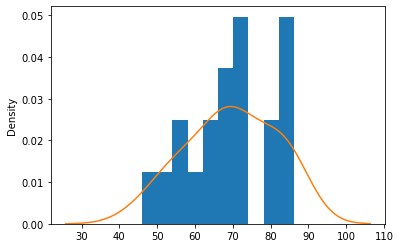

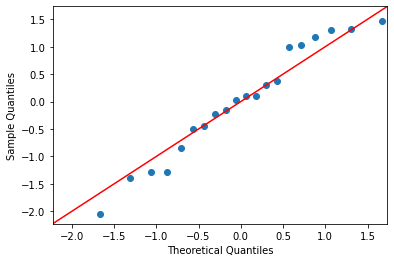

In [11]:
#对Dosage=10mg的正态性检验
number1=df1[df1["Dosage"] == "10mg" ].Scores
fig, ax = plt.subplots()
number1.plot.hist(ax=ax,density=True)
number1.plot.kde(ax=ax)
plt.show()

sm.qqplot(number1,line='45',fit=True,dist=stats.norm)
plt.show()

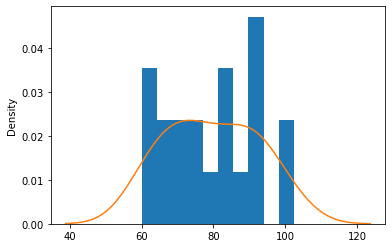

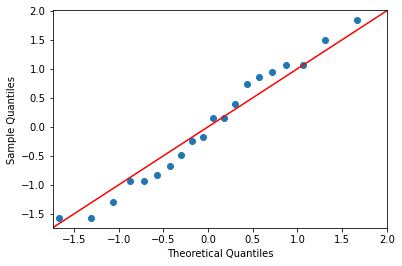

In [11]:
#对Dosage=50mg的正态性检验
number1=df1[df1["Dosage"] == "50mg" ].Scores
fig, ax = plt.subplots()
number1.plot.hist(ax=ax,density=True)
number1.plot.kde(ax=ax)
plt.show()

sm.qqplot(number1,line='45',fit=True,dist=stats.norm)
plt.show()

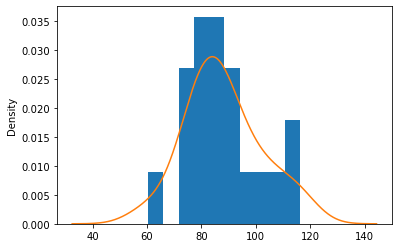

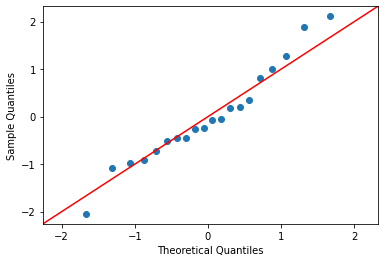

In [12]:
#对Dosage=100mg的正态性检验
number1=df1[df1["Dosage"] == "100mg" ].Scores
fig, ax = plt.subplots()
number1.plot.hist(ax=ax,density=True)
number1.plot.kde(ax=ax)
plt.show()

sm.qqplot(number1,line='45',fit=True,dist=stats.norm)
plt.show()

#### 3.1.1 由上面三组直方图+QQplot的观察可知，Dosage=10mg，Dosage=50mg，Dosage=100mg满足正态性分布

In [13]:
#方差齐次性检验
stats.levene(df1['Scores'][df1['Dosage'] == '10mg'],
             df1['Scores'][df1['Dosage'] == '50mg'],
             df1['Scores'][df1['Dosage'] == '100mg'])

LeveneResult(statistic=0.20043136366903844, pvalue=0.8189519500285235)

#### 3.1.2、p大于0.05代说明方差齐性

In [14]:
stats.f_oneway(df1['Scores'][df1['Dosage'] == '10mg'], 
             df1['Scores'][df1['Dosage'] == '50mg'],
             df1['Scores'][df1['Dosage'] == '100mg'])

F_onewayResult(statistic=10.480888179350172, pvalue=0.000132985471347459)

### 3.1.3  由F=10.48>1,p=0.00013<0.05,即不同剂量组间有治疗效果差异

In [17]:
from statsmodels.formula.api import ols

In [18]:
#正态性检验Shapiro-Wilk检验
# model_name = ols('outcome_variable ~ C(group_variable)', data=your_data).fit()
results11 = ols('Scores ~ C(Dosage)', data=df1).fit()    #普通最小二乘法
aov_table = sm.stats.anova_lm(results11, typ=2)
aov_table
stats.shapiro(results11.resid)

ShapiroResult(statistic=0.9873320460319519, pvalue=0.7893600463867188)

In [19]:
#模型效应量
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Dosage),3438.030406,2.0,1719.015203,10.480888,0.000133,0.268872,0.240139
Residual,9348.813276,57.0,164.014268,NaN,NaN,NaN,NaN


## 3.2表单SleepExp_2.csv是招募20名被试，每个被试连续进行了三种剂量治疗的（10mg, 50mg, 100mg)实验 ，表单Scores是每个剂量治疗后被试的评分，请推断不同剂量组间是否有治疗效果差异？

In [20]:
df2=pd.read_csv("SleepExp_2.csv")
df2.head()

,Subjects,Dosage,Scores
0,S1,10mg,59.497332
1,S2,10mg,95.574353
2,S3,10mg,79.346071
3,S4,10mg,65.558919
4,S5,10mg,68.947775


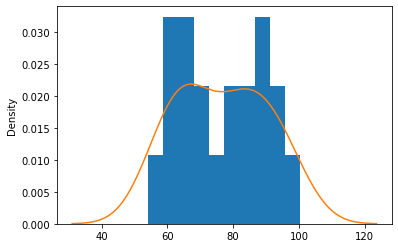

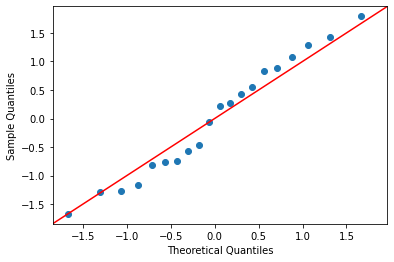

In [21]:
#对Dosage=10mg的正态性检验
number2=df2[df2["Dosage"] == "10mg" ].Scores
fig, ax = plt.subplots()
number2.plot.hist(ax=ax,density=True)
number2.plot.kde(ax=ax)
plt.show()

sm.qqplot(number2,line='45',fit=True,dist=stats.norm)
plt.show()

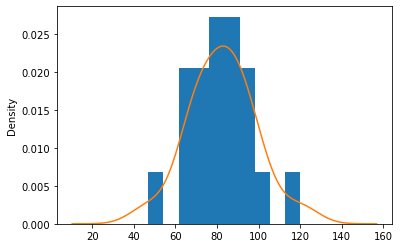

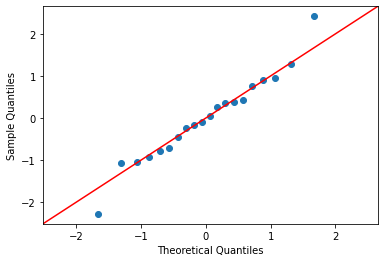

In [17]:
#对Dosage=50mg的正态性检验
number=df2[df2["Dosage"] == "50mg" ].Scores
fig, ax = plt.subplots()
number.plot.hist(ax=ax,density=True)
number.plot.kde(ax=ax)
plt.show()

sm.qqplot(number,line='45',fit=True,dist=stats.norm)
plt.show()

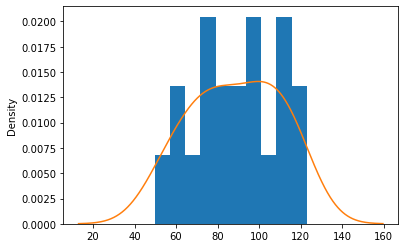

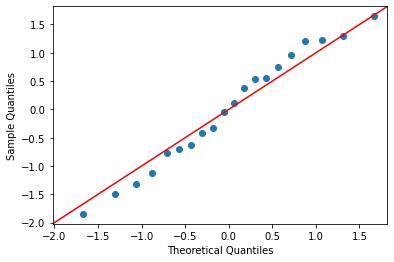

In [18]:
#对Dosage=100mg的正态性检验
number=df2[df2["Dosage"] == "100mg" ].Scores
fig, ax = plt.subplots()
number.plot.hist(ax=ax,density=True)
number.plot.kde(ax=ax)
plt.show()

sm.qqplot(number,line='45',fit=True,dist=stats.norm)
plt.show()

### 3.2.1 由上面三组直方图+QQplot的观察可知，Dosage=10mg，Dosage=50mg，Dosage=100mg满足正态性分布

In [19]:
stats.levene(df2['Scores'][df2['Dosage'] == '10mg'],
             df2['Scores'][df2['Dosage'] == '50mg'],
             df2['Scores'][df2['Dosage'] == '100mg'])

LeveneResult(statistic=3.0581977792043964, pvalue=0.05474960522515964)

#### 3.2.2、由上面 p大于0.05代说明方差齐性

In [20]:
stats.f_oneway(df2['Scores'][df2['Dosage'] == '10mg'], 
             df2['Scores'][df2['Dosage'] == '50mg'],
             df2['Scores'][df2['Dosage'] == '100mg'])

F_onewayResult(statistic=2.365277329737121, pvalue=0.10308091849291724)

### 3.2.3  由F=2.36>1,,由上面F值可得存在组间差异，但是由p=0.103>0.05，认为组间差异不够显著，所以综合两点认为不同剂量组间没有治疗效果差异

In [24]:
#正态性检验Shapiro-Wilk检验
# model_name = ols('outcome_variable ~ C(group_variable)', data=your_data).fit()
results21 = ols('Scores ~ C(Dosage)', data=df2).fit()
aov_table = sm.stats.anova_lm(results21, typ=2)
aov_table
stats.shapiro(results21.resid)

ShapiroResult(statistic=0.9908171892166138, pvalue=0.9328959584236145)

In [25]:
#模型效应量
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Dosage),1429.817334,2.0,714.908667,2.365277,0.103081,0.076632,0.043528
Residual,17228.336608,57.0,302.251519,NaN,NaN,NaN,NaN


## 3.3表单SleepExp_3.csv是招募了30名被试，每个被试连续进行了三种剂量治疗的（10mg, 50mg, 100mg)实验 ，表单Scores是每个剂量治疗后被试的评分，请推断剂量、性别、及剂量与性别相互作用的效应分别对治疗评分的影响是否显著？

In [27]:
df3=pd.read_csv("SleepExp_3.csv")
df3.head()

,Subjects,Dosage,Scores,Gender
0,S1,10mg,73.307958,Female
1,S2,10mg,80.138753,Female
2,S3,10mg,75.630965,Female
3,S4,10mg,77.649084,Female
4,S5,10mg,84.920238,Female


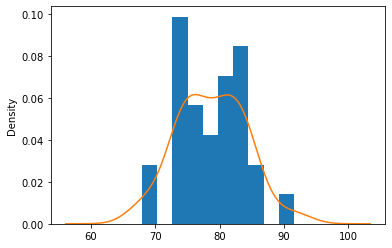

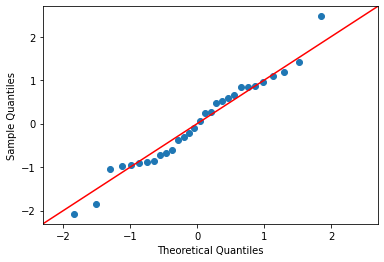

In [28]:
#对Dosage=10mg的正态性检验
number3=df3[df3["Dosage"] == "10mg" ].Scores
fig, ax = plt.subplots()
number3.plot.hist(ax=ax,density=True)
number3.plot.kde(ax=ax)
plt.show()

sm.qqplot(number3,line='45',fit=True,dist=stats.norm)
plt.show()

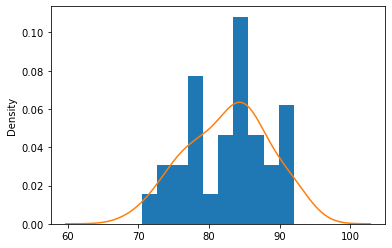

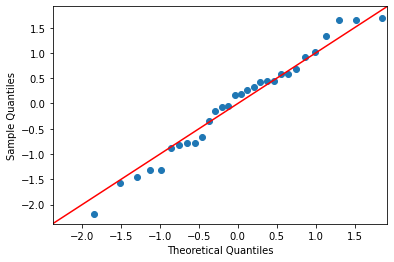

In [23]:
#对Dosage=50mg的正态性检验
number3=df3[df3["Dosage"] == "50mg" ].Scores
fig, ax = plt.subplots()
number3.plot.hist(ax=ax,density=True)
number3.plot.kde(ax=ax)
plt.show()

sm.qqplot(number3,line='45',fit=True,dist=stats.norm)
plt.show()

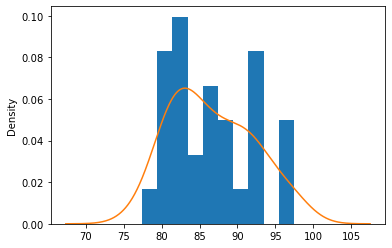

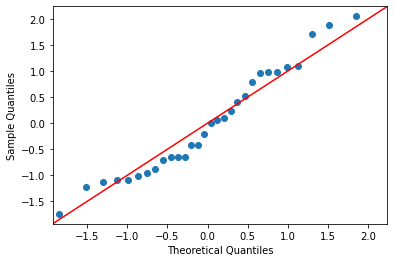

In [24]:
#对Dosage=100mg的正态性检验
number3=df3[df3["Dosage"] == "100mg" ].Scores
fig, ax = plt.subplots()
number3.plot.hist(ax=ax,density=True)
number3.plot.kde(ax=ax)
plt.show()

sm.qqplot(number3,line='45',fit=True,dist=stats.norm)
plt.show()

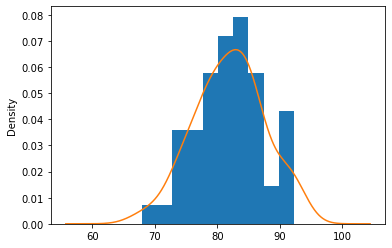

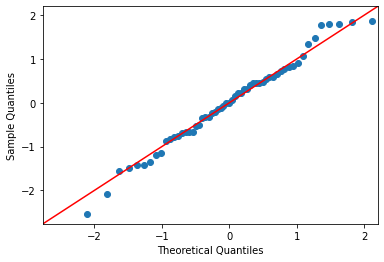

In [25]:
#对Gender=Female的正态性检验
number3=df3[df3["Gender"] == "Female" ].Scores
fig, ax = plt.subplots()
number3.plot.hist(ax=ax,density=True)
number3.plot.kde(ax=ax)
plt.show()

sm.qqplot(number3,line='45',fit=True,dist=stats.norm)
plt.show()

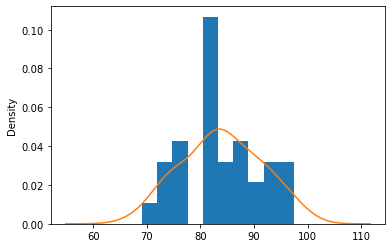

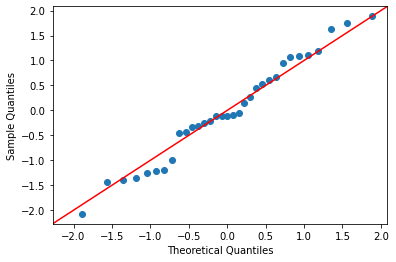

In [26]:
#对Gender=Male的正态性检验
number3=df3[df3["Gender"] == "Male" ].Scores
fig, ax = plt.subplots()
number3.plot.hist(ax=ax,density=True)
number3.plot.kde(ax=ax)
plt.show()

sm.qqplot(number3,line='45',fit=True,dist=stats.norm)
plt.show()

### 3.3.1 由上面五组直方图+QQplot的观察可知，Dosage=10mg，Dosage=50mg，Dosage=100mg 和Gender=Male，Gender=Female满足正态性分布

In [27]:
#检验方差齐性
stats.levene(df3['Scores'][df3['Dosage'] == '10mg'], 
             df3['Scores'][df3['Dosage'] == '50mg'],
             df3['Scores'][df3['Dosage'] == '100mg'],
            df3['Scores'][df3['Gender'] == 'Female'], 
             df3['Scores'][df3['Gender'] == 'Male'])

LeveneResult(statistic=0.9395494815446712, pvalue=0.44239800512136884)

#### 3.3.2、由上面 p大于0.05代说明方差齐性

In [28]:
#双因素方法分析
import pandas as pd
import pingouin as pg

aov = pg.anova(dv='Scores', between=['Gender', 'Dosage'], data=df3,
             detailed=True)

print(aov)

            Source           SS    DF          MS          F     p-unc  \
0           Gender    84.627250   1.0   84.627250   2.899540  0.092303   
1           Dosage   931.004542   2.0  465.502271  15.949265  0.000001   
2  Gender * Dosage    47.620592   2.0   23.810296   0.815800  0.445758   
3         Residual  2451.661026  84.0   29.186441        NaN       NaN   

        np2  
0  0.033367  
1  0.275228  
2  0.019054  
3       NaN  


### 3.3.3  由上表可得 Gender与治疗评分的F值<F<sub>(1,86)(0.05)</sub>------>性别对治疗评分的影响不显著
### 由上表可得 Dosage与治疗评分的F值> F<sub>(2,86)(0.05)</sub>------>Dosage对治疗评分的影响显著
### 由上表可得Gender * Dosage的交互作用与治疗评分的F值< F<sub<(2,86)(0.05)</sub>------>Gender * Dosage的交互作用对治疗评分的影响不显著

In [29]:
#正态性检验Shapiro-Wilk检验
# model_name = ols('outcome_variable ~ C(group_variable)', data=your_data).fit()
results31 = ols('Scores ~ C(Dosage)', data=df3).fit()
aov_table = sm.stats.anova_lm(results31, typ=2)
aov_table
stats.shapiro(results31.resid)

ShapiroResult(statistic=0.9873884320259094, pvalue=0.5414252281188965)

In [30]:
#模型效应量
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Dosage),931.004542,2.0,465.502271,15.673423,0.000002,0.264873,0.245895
Residual,2583.908868,87.0,29.700102,NaN,NaN,NaN,NaN


## 3.4表单SleepExp_4.csv是招募了15名被试，每个被试分别在春季，秋季都连续进行了三种剂量治疗的（10mg, 50mg, 100mg)实验 ，表单Scores是每个剂量治疗后被试的评分，请推断剂量、季节、及剂量与季节相互作用的效应分别对治疗评分的影响是否显著？

In [29]:
df4=pd.read_csv("SleepExp_4.csv")
df4.head()

,Subjects,Dosage,Scores,Season
0,S1,10mg,70.542837,Spring
1,S2,10mg,78.720910,Spring
2,S3,10mg,81.931458,Spring
3,S4,10mg,70.631059,Spring
4,S5,10mg,85.274465,Spring


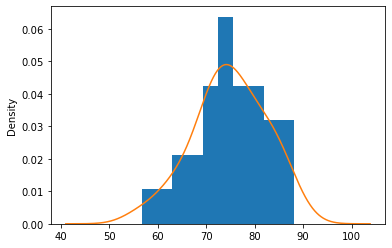

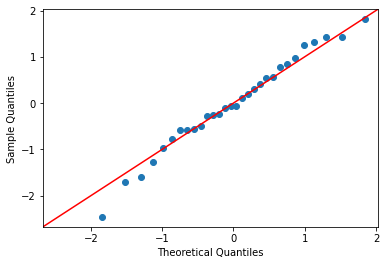

In [30]:
#对Dosage=10mg的正态性检验
number4=df4[df4["Dosage"] == "10mg" ].Scores
fig, ax = plt.subplots()
number4.plot.hist(ax=ax,density=True)
number4.plot.kde(ax=ax)
plt.show()

sm.qqplot(number4,line='45',fit=True,dist=stats.norm)
plt.show()

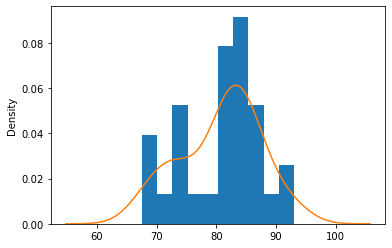

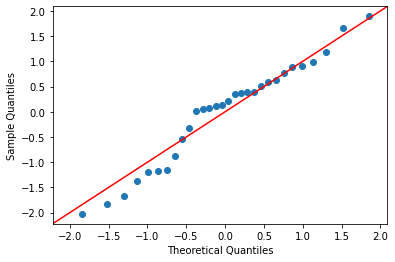

In [31]:
#对Dosage=50mg的正态性检验
number4=df4[df4["Dosage"] == "50mg" ].Scores
fig, ax = plt.subplots()
number4.plot.hist(ax=ax,density=True)
number4.plot.kde(ax=ax)
plt.show()

sm.qqplot(number4,line='45',fit=True,dist=stats.norm)
plt.show()

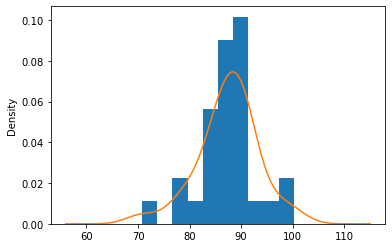

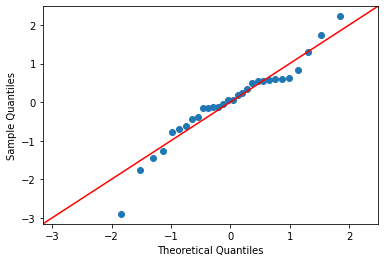

In [32]:
#对Dosage=100mg的正态性检验
number4=df4[df4["Dosage"] == "100mg" ].Scores
fig, ax = plt.subplots()
number4.plot.hist(ax=ax,density=True)
number4.plot.kde(ax=ax)
plt.show()

sm.qqplot(number4,line='45',fit=True,dist=stats.norm)
plt.show()

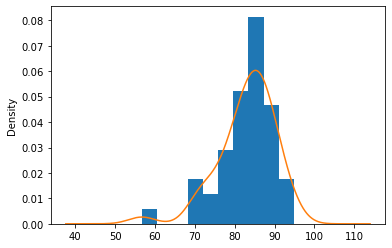

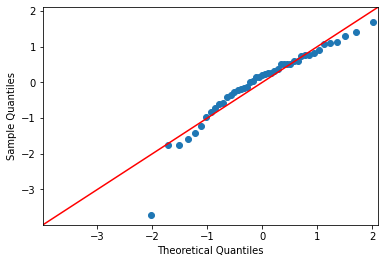

In [33]:
#对Season=Spring的正态性检验
number4=df4[df4["Season"] == "Spring" ].Scores
fig, ax = plt.subplots()
number4.plot.hist(ax=ax,density=True)
number4.plot.kde(ax=ax)
plt.show()

sm.qqplot(number4,line='45',fit=True,dist=stats.norm)
plt.show()

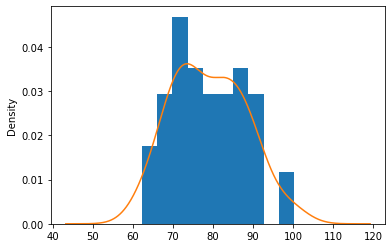

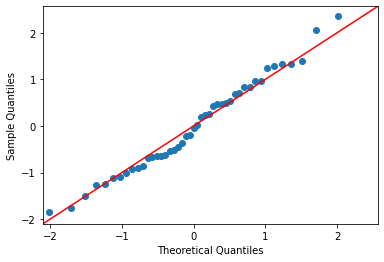

In [34]:
#对Season=Fall的正态性检验
number4=df4[df4["Season"] == "Fall" ].Scores
fig, ax = plt.subplots()
number4.plot.hist(ax=ax,density=True)
number4.plot.kde(ax=ax)
plt.show()

sm.qqplot(number4,line='45',fit=True,dist=stats.norm)
plt.show()

# 重复测量应该用球形检验Mauchly’s test of sphericity

In [ ]:
# pg.sphericity(data)

In [35]:
#检验方差齐性
stats.levene(df4['Scores'][df4['Dosage'] == '10mg'], 
             df4['Scores'][df4['Dosage'] == '50mg'],
             df4['Scores'][df4['Dosage'] == '100mg'],
            df4['Scores'][df4['Season'] == 'Fall'], 
             df4['Scores'][df4['Season'] == 'Spring'])

LeveneResult(statistic=3.106309032021947, pvalue=0.016824054000275077)

#### 3.4.2、由上面 p小于0.05代说明不具有方差齐性

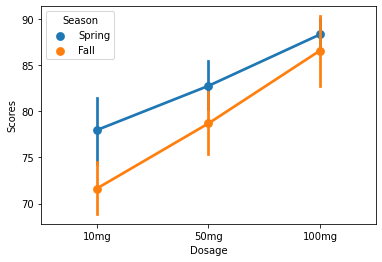

In [36]:
#由于方差不齐性，我们来直观看一下数据分布--------->暗示交互效应
import seaborn as sns
ax = sns.pointplot(x='Dosage', y='Scores', hue='Season', data=df4)

In [37]:
# 考虑到每个受试者测量了多个数据，所以进行双因素重复测量
from statsmodels.stats.anova import AnovaRM
aovrm2way = AnovaRM(df4, 'Scores', 'Subjects', within=['Dosage', 'Season'])
res2way = aovrm2way.fit()

print(res2way)

                   Anova
              F Value Num DF  Den DF Pr > F
-------------------------------------------
Dosage        36.5660 2.0000 28.0000 0.0000
Season         6.7376 1.0000 14.0000 0.0212
Dosage:Season  0.8290 2.0000 28.0000 0.4469



### 3.4.3  由上表可得Season与治疗评分的F值>F<sub>(2,86)(0.05)</sub>------>Season对治疗评分的影响显著
### 由上表可得 Dosage与治疗评分的F值> F<sub>(1,86)(0.05)</sub>------>Dosage对治疗评分的影响显著
### 由上表可得Season * Dosage的交互作用与治疗评分的F值< F<sub>(2,86)(0.05)</sub>---由于本题方差不齐性，结合上面数据分布的关系图可知------>Season * Dosage的交互作用对治疗评分的影响显著

## （5）表单SleepExp_5.csv从上海、北京招募了90名被试，随机分成三种剂量治疗组（10mg, 50mg, 100mg) 进行睡眠实验，表单Scores是每个被试治疗后的评分，请推断剂量、城市、及剂量与城市相互作用的效应分别对治疗评分的影响是否显著？


In [38]:
from statsmodels.stats.anova import AnovaRM

In [39]:
df5=pd.read_csv("SleepExp_5.csv")
df5.head()

,Subjects,Dosage,Scores,City
0,S1,10mg,78.686760,Shanghai
1,S2,10mg,71.913514,Shanghai
2,S3,10mg,77.314652,Shanghai
3,S4,10mg,73.279049,Shanghai
4,S5,10mg,79.897818,Shanghai


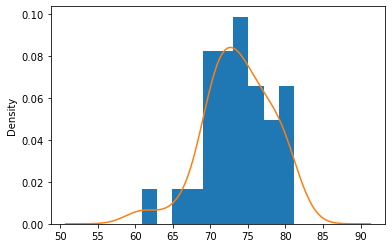

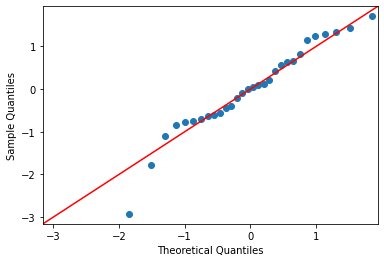

In [40]:
#对Dosage=10mg的正态性检验
number5=df5[df5["Dosage"] == "10mg" ].Scores
fig, ax = plt.subplots()
number5.plot.hist(ax=ax,density=True)
number5.plot.kde(ax=ax)
plt.show()

sm.qqplot(number5,line='45',fit=True,dist=stats.norm)
plt.show()

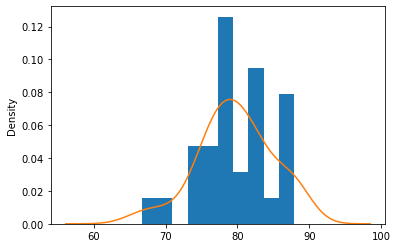

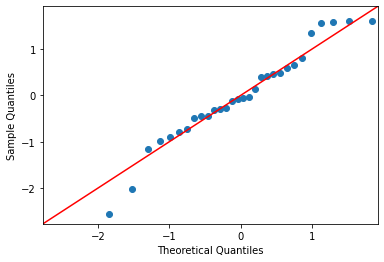

In [41]:
#对Dosage=50mg的正态性检验
number5=df5[df5["Dosage"] == "50mg" ].Scores
fig, ax = plt.subplots()
number5.plot.hist(ax=ax,density=True)
number5.plot.kde(ax=ax)
plt.show()

sm.qqplot(number5,line='45',fit=True,dist=stats.norm)
plt.show()

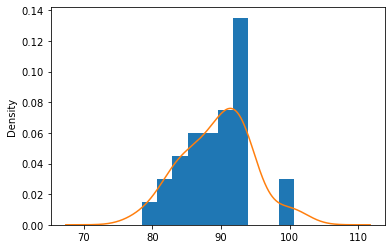

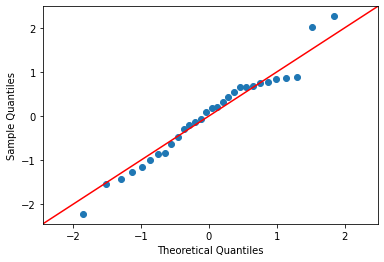

In [42]:
#对Dosage=100mg的正态性检验
number5=df5[df5["Dosage"] == "100mg" ].Scores
fig, ax = plt.subplots()
number5.plot.hist(ax=ax,density=True)
number5.plot.kde(ax=ax)
plt.show()

sm.qqplot(number5,line='45',fit=True,dist=stats.norm)
plt.show()

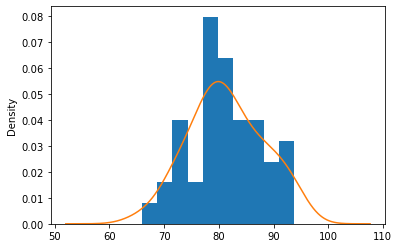

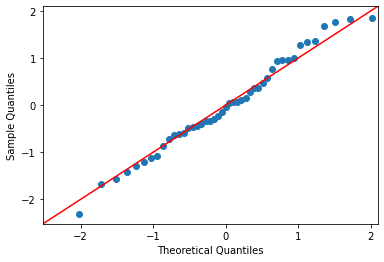

In [43]:
#对City=Shanghai的正态性检验
number5=df5[df5["City"] == "Shanghai" ].Scores
fig, ax = plt.subplots()
number5.plot.hist(ax=ax,density=True)
number5.plot.kde(ax=ax)
plt.show()

sm.qqplot(number5,line='45',fit=True,dist=stats.norm)
plt.show()

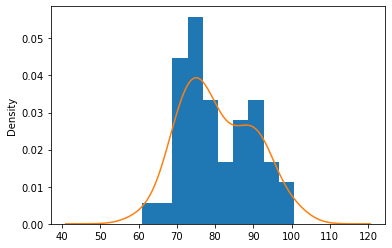

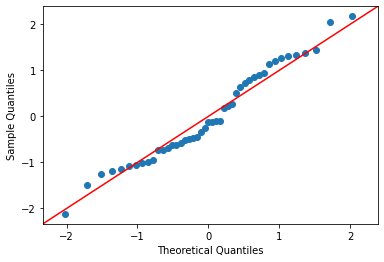

In [44]:
#对City=Beijing的正态性检验
number5=df5[df5["City"] == "Beijing" ].Scores
fig, ax = plt.subplots()
number5.plot.hist(ax=ax,density=True)
number5.plot.kde(ax=ax)
plt.show()

sm.qqplot(number5,line='45',fit=True,dist=stats.norm)
plt.show()

In [45]:
stats.levene(df5['Scores'][df5['Dosage'] == '10mg'], 
             df5['Scores'][df5['Dosage'] == '50mg'],
             df5['Scores'][df5['Dosage'] == '100mg'],
            df5['Scores'][df5['City'] == 'Shanghai'], 
             df5['Scores'][df5['City'] == 'Beijing'])

LeveneResult(statistic=7.858205845043514, pvalue=7.563665829634071e-06)

#### 3.5.2、由上面 p大于0.05说明方差齐性

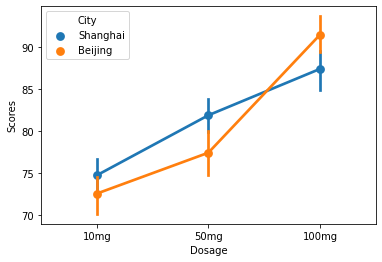

In [46]:
#我们来直观看一下数据分布--------->暗示交互效应
import seaborn as sns
ax = sns.pointplot(x='Dosage', y='Scores', hue='City', data=df5)

In [47]:
#双因素方法分析
import pandas as pd
import pingouin as pg

aov = pg.anova(dv='Scores', between=['City', 'Dosage'], data=df5,
             detailed=True)

print(aov)

          Source           SS  DF           MS          F         p-unc  \
0           City    16.547897   1    16.547897   0.785610  3.779613e-01   
1         Dosage  3820.313727   2  1910.156863  90.684583  1.042343e-21   
2  City * Dosage   292.849482   2   146.424741   6.951506  1.608036e-03   
3       Residual  1769.354510  84    21.063744        NaN           NaN   

        np2  
0  0.009266  
1  0.683460  
2  0.142008  
3       NaN  


### 3.5.3  由上表可得City与治疗评分的F值<F<sub>(2,86)(0.05)</sub>------>City对治疗评分的影响不显著
### 由上表可得 Dosage与治疗评分的F值> F<sub>(1,86)(0.05)</sub>------>Dosage对治疗评分的影响显著
### 由上表可得City * Dosage的交互作用与治疗评分的F值> F<sub>(2,86)(0.05)</sub>------>City * Dosage的交互作用对治疗评分的影响显著

## 作业附加题（5分 bonus）：

### 在该数据里，请对每组数据（control, treatment1, treatment2, + before treatment, after treatment）做正态检验。

### 在该数据里，对不同的组别间进行比较，找出哪些组群的方差是一样的。

In [1]:
import pandas as pd
from scipy.stats import levene
import statsmodels.api as sm

In [2]:
df6 = pd.read_csv('data_test.csv')
df6.head(10)

,group,before_treatment,after_treatment
0,control,27.9,33.8
1,control,16.8,9.3
2,control,27.2,23.4
3,control,12.5,19.9
4,control,14.4,16.0
5,control,13.5,19.9
6,control,17.1,21.1
7,control,21.4,16.9
8,control,18.5,17.8
9,control,18.3,15.2


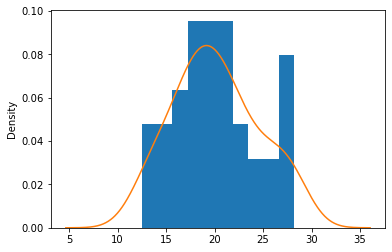

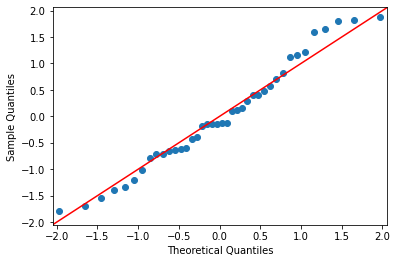

In [5]:
1.1 #对group=control中before_treatment的正态性检验
number6=df6[df6["group"] == "control" ].before_treatment
fig, ax = plt.subplots()
number6.plot.hist(ax=ax,density=True)
number6.plot.kde(ax=ax)
plt.show()

sm.qqplot(number6,line='45',fit=True,dist=stats.norm)
plt.show()

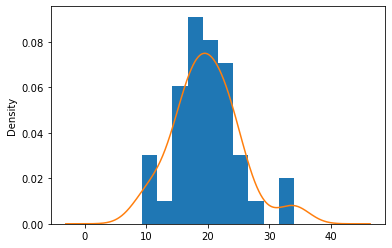

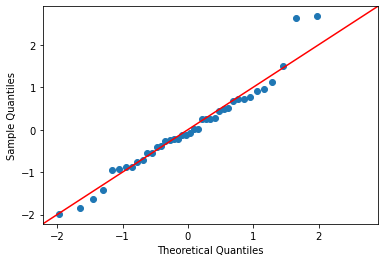

In [51]:
1.2 #对group=control中after_treatment的正态性检验
number6=df6[df6["group"] == "control" ].after_treatment
fig, ax = plt.subplots()
number6.plot.hist(ax=ax,density=True)
number6.plot.kde(ax=ax)
plt.show()

sm.qqplot(number6,line='45',fit=True,dist=stats.norm)
plt.show()

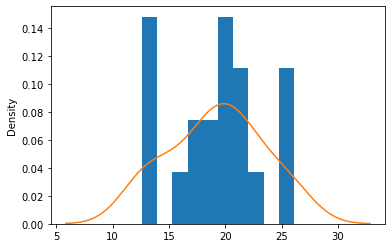

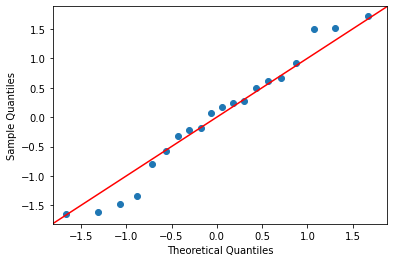

In [52]:
1.3 #对group=treatment1中before_treatment的正态性检验
number6=df6[df6["group"] == "treatment1" ].before_treatment
fig, ax = plt.subplots()
number6.plot.hist(ax=ax,density=True)
number6.plot.kde(ax=ax)
plt.show()

sm.qqplot(number6,line='45',fit=True,dist=stats.norm)
plt.show()

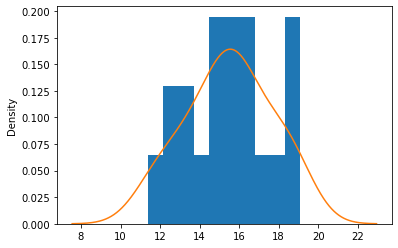

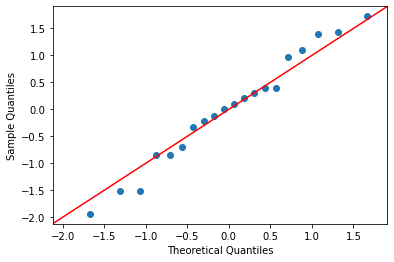

In [53]:
1.4 #对group=treatment1中after_treatment的正态性检验
number6=df6[df6["group"] == "treatment1" ].after_treatment
fig, ax = plt.subplots()
number6.plot.hist(ax=ax,density=True)
number6.plot.kde(ax=ax)
plt.show()

sm.qqplot(number6,line='45',fit=True,dist=stats.norm)
plt.show()

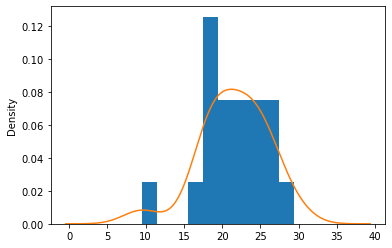

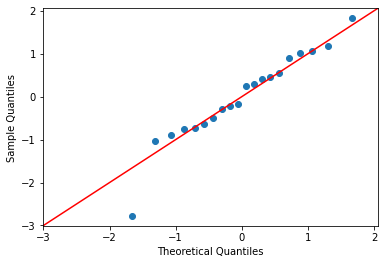

In [54]:
1.5 #对group=treatment2中before_treatment的正态性检验
number6=df6[df6["group"] == "treatment2" ].before_treatment
fig, ax = plt.subplots()
number6.plot.hist(ax=ax,density=True)
number6.plot.kde(ax=ax)
plt.show()

sm.qqplot(number6,line='45',fit=True,dist=stats.norm)
plt.show()

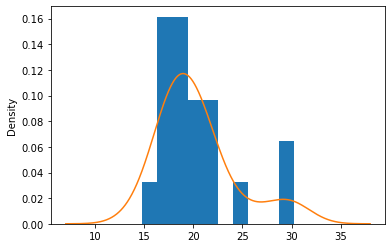

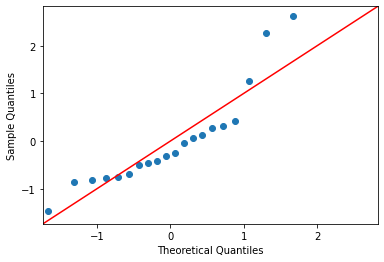

In [55]:
1.6 #对group=treatment2中after_treatment的正态性检验
number6=df6[df6["group"] == "treatment2" ].after_treatment
fig, ax = plt.subplots()
number6.plot.hist(ax=ax,density=True)
number6.plot.kde(ax=ax)
plt.show()

sm.qqplot(number6,line='45',fit=True,dist=stats.norm)
plt.show()

### 由以上六祖的正态性检验可知，大体上都符合正态分布

In [56]:
df_agg = (
    df6.groupby("group")
    .agg(
        avg_bef_treat=("before_treatment", "mean"),
        var_bef_treat=("before_treatment", "var"),
        avg_aft_treat=("after_treatment", "mean"),
        var_aft_treat=("after_treatment", "var"),
    )
    .reset_index()
)

print(df_agg)

        group  avg_bef_treat  var_bef_treat  avg_aft_treat  var_aft_treat
0     control         20.145      18.878436         19.825      28.825513
1  treatment1         19.210      17.007263         15.475       4.649342
2  treatment2         21.510      19.673579         20.315      15.141458


Here you can clearly see the difference between “var_bef_tr” (variance before treatment) across 3 groups is not that different: 18.88, 17.01, 19.67.

However the difference between “var_aft_tr” (variance after treatment) across 3 groups is quite different: 28.83, 4.65, 15.14.

The difference in variance after treatment across three groups is large enough for us to be almost sure that it is significantly different, but to check it statistically we will perform the Levene’s test in Python!

In [57]:
control_group = df6[df6['group']=='control']['after_treatment']

treatment1_group = df6[df6['group']=='treatment1']['after_treatment']

treatment2_group = df6[df6['group']=='treatment2']['after_treatment']

In [58]:
stat, p_value = levene(control_group, treatment1_group, treatment2_group)

print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

Lavene's test statistic: 4.240957881271611
P-value: 0.017895111992486838


由于p值小于0.05，我们拒绝了零假设，并得出结论，至少有一对组具有不等方差（不是我们想要的“方差齐性”数据）

### 下面进行两两方差齐性检验

In [59]:
#2.1
stats.levene(df6[df6['group']=='control']['before_treatment'],
             df6[df6['group']=='treatment1']['before_treatment'])

LeveneResult(statistic=0.07572484014760779, pvalue=0.7841547767513246)

In [60]:
#2.2
stats.levene(df6[df6['group']=='control']['before_treatment'],
             df6[df6['group']=='treatment2']['before_treatment'])

LeveneResult(statistic=0.00042357718233532784, pvalue=0.9836505447627644)

In [61]:
#2.3
stats.levene(df6[df6['group']=='treatment1']['before_treatment'],
             df6[df6['group']=='treatment2']['before_treatment'])

LeveneResult(statistic=0.04861867980855859, pvalue=0.8266649488419037)

In [62]:
#2.4
stats.levene(df6[df6['group']=='control']['after_treatment'],
             df6[df6['group']=='treatment1']['after_treatment'])

LeveneResult(statistic=7.9210506367615645, pvalue=0.006662359733084818)

In [63]:
#2.5
stats.levene(df6[df6['group']=='control']['after_treatment'],
             df6[df6['group']=='treatment2']['after_treatment'])

LeveneResult(statistic=2.0484937456965127, pvalue=0.15772334284291378)

In [65]:
#2.6
stats.levene(df6[df6['group']=='treatment1']['after_treatment'],
             df6[df6['group']=='treatment2']['after_treatment'])

LeveneResult(statistic=1.8979290993329645, pvalue=0.1763703343977185)

### 由上面结果可知 组2.1、2.2、2.3、2.5、2.6具有方差齐性，可认为方差是相等的
### 组2.4 即after_treatment的control和treatment1组不具有方差齐性，其方差是不相等的

In [6]:
stats.ttest_ind(df6['after_treatment'][df6['group'] == 'control'], df6['after_treatment'][df6['group'] == 'treatment1'])

Ttest_indResult(statistic=3.473968914751431, pvalue=0.000976759901179921)

In [7]:
stats.ttest_ind(df6['after_treatment'][df6['group'] == 'control'], df6['after_treatment'][df6['group'] == 'treatment2'])

Ttest_indResult(statistic=-0.36264369967004995, pvalue=0.7181892404531662)

In [8]:
stats.ttest_ind(df6['after_treatment'][df6['group'] == 'treatment1'], df6['after_treatment'][df6['group'] == 'treatment2'])

Ttest_indResult(statistic=-4.865513529020892, pvalue=2.0190458098080064e-05)